In [26]:
import numpy as np
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
import pycaret.classification as pc
from sklearn.metrics import log_loss, f1_score, roc_auc_score, auc, roc_curve
import mlflow
from mlflow.models.signature import infer_signature
from mlflow.tracking import MlflowClient
import os
import shutil




In [2]:
X_train = pd.read_parquet('../../data/processed/base_train.parquet')
X_test = pd.read_parquet('../../data/processed/base_test.parquet')

In [3]:
cvfold = model_selection.StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)

def plot_parameter_validation_curve(X, y,
                                    param_name, grid_search,
                                    model, model_name, scoring,
                                    logx):
    print('Parameter:', param_name)
    print('GridSearch:', grid_search[param_name])
    print('Scoring:', scoring)
    figure = plt.figure(figsize=(6,4))
    train_scores, test_scores = validation_curve(model,
                                                 X = X, 
                                                 y = y, 
                                                 param_name=param_name, 
                                                 param_range= grid_search[param_name],
                                                 scoring=scoring,
                                                 cv=cvfold,
                                                 n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Curva Validação Modelo " + model_name)
    plt.xlabel(param_name)
    plt.ylabel("Score ("+scoring+")")
    if logx:
        plt.semilogx(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.semilogx(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                     color="navy", lw=2)
    else:
        plt.plot(grid_search[param_name], train_scores_mean,'-o', label="Treino",
                     color="darkorange", lw=2)
        plt.plot(grid_search[param_name], test_scores_mean,'-o', label="Validação-Cruzada",
                 color="navy", lw=2)
    plt.fill_between(grid_search[param_name], train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=2)
    plt.fill_between(grid_search[param_name], test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=2)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
    return figure


In [4]:
mlflow.set_tracking_uri("sqlite:///../mlruns.db")

experiment_name = 'Projeto Kobe'
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    experiment_id = mlflow.create_experiment(experiment_name)
    experiment = mlflow.get_experiment(experiment_id)
experiment_id = experiment.experiment_id

,Description,Value
0,Session id,3270
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(20285, 7)"
4,Transformed data shape,"(19473, 19)"
5,Transformed train set shape,"(15416, 19)"
6,Transformed test set shape,"(4057, 19)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.5390,0.0000,0.5927,0.5149,0.5510,0.0821,0.0830,0.1810
lr,Logistic Regression,0.5837,0.0000,0.4376,0.5854,0.5006,0.1565,0.1614,0.1680


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5864,0.5981,0.4300,0.5920,0.4982,0.1612,0.1672


Parameter: C
GridSearch: [0.001, 0.01, 0.1, 1, 10]
Scoring: f1


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

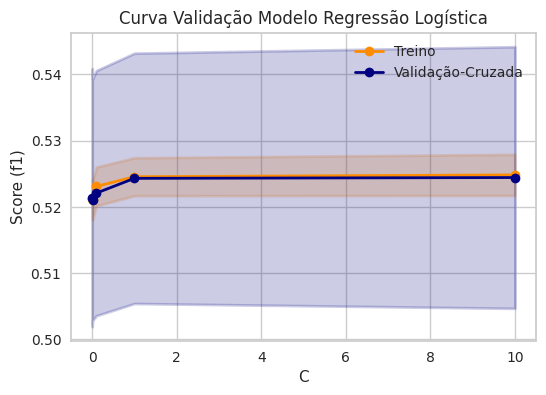

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5327,0.5058,0.5746,0.5094,0.5400,0.0686,0.0691


Parameter: max_depth
GridSearch: [2, 3, 4, 5, 6, 7, 8]
Scoring: f1


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

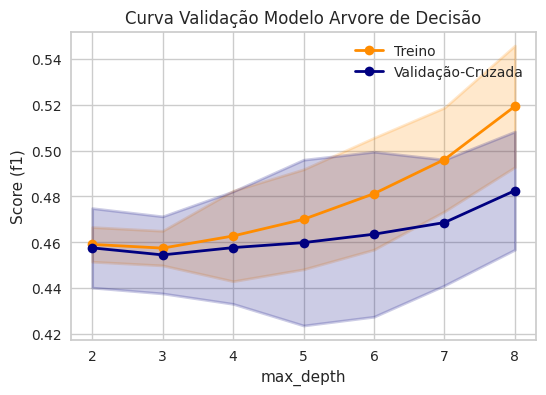

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5884,0.0000,0.4884,0.5815,0.5309,0.1692,0.1712
1,0.5878,0.0000,0.5078,0.5771,0.5402,0.1694,0.1706
2,0.5847,0.0000,0.4826,0.5781,0.5260,0.1618,0.1639
3,0.5644,0.0000,0.4903,0.5491,0.5181,0.1230,0.1236
4,0.5940,0.0000,0.4619,0.5967,0.5207,0.1783,0.1827
5,0.5779,0.0000,0.4658,0.5712,0.5131,0.1474,0.1498
6,0.5459,0.0000,0.4271,0.5304,0.4732,0.0823,0.0838
7,0.6038,0.0000,0.5187,0.5982,0.5556,0.2015,0.2031
8,0.5777,0.0000,0.4703,0.5696,0.5152,0.1471,0.1492


Fitting 10 folds for each of 4 candidates, totalling 40 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5815,0.5980,0.4667,0.5762,0.5157,0.1543,0.1569


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Registered model 'modelo_kobe' already exists. Creating a new version of this model...
Created version '11' of model 'modelo_kobe'.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were f

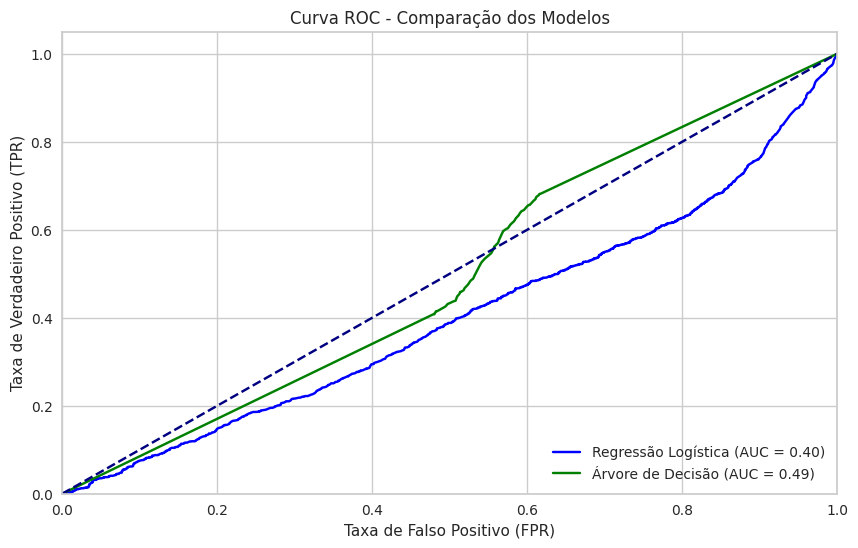

In [32]:

model_version = -1
registered_model_name = 'modelo_kobe'
nexamples = 5

with mlflow.start_run(experiment_id=experiment_id, run_name = 'Treinamento'):
    exp = pc.setup(data=X_train, target='shot_made_flag', test_data=X_test, normalize=True,
                 remove_multicollinearity=True, multicollinearity_threshold=0.95,
                 polynomial_features=True,  remove_outliers=True,
                 log_experiment=False,  fold_strategy='stratifiedkfold')

    list_models = pc.compare_models(['lr', 'dt'], n_select=2, sort='f1')
    
    #Regressão Logística
    yhat_test = exp.predict_model(list_models[1])
    
    figure = plot_parameter_validation_curve(X_train.drop('shot_made_flag', axis = 1), 
                                             X_train['shot_made_flag'], 
                                             'C', 
                                             {'C': [0.001, 0.01, 0.1, 1, 10]}, 
                                             list_models[1], 
                                             'Regressão Logística', 
                                             'f1', 
                                             logx=False)            
    
    mlflow.log_metrics({
        'lr_log_loss': log_loss(yhat_test.shot_made_flag, yhat_test.prediction_label),
        'lr_f1': f1_score(yhat_test.shot_made_flag, yhat_test.prediction_label)
    }) 
    
    figure.savefig('lr_validation_curve.png')
    
    artifact = pc.plot_model(list_models[1], plot='confusion_matrix', save=True)
    new_name = 'matriz_confusao_lr.png'
    new_path = os.path.join(os.getcwd(), new_name)  # Ou escolha outro diretório
    shutil.move(artifact, new_path)  
    mlflow.log_artifact(new_path)

    
    #Arvore de Decisão
    yhat_test = exp.predict_model(list_models[0])
    
    figure = plot_parameter_validation_curve(X_train.drop('shot_made_flag', axis = 1), 
                                             X_train['shot_made_flag'], 
                                             'max_depth', {'max_depth': [2, 3, 4, 5, 6, 7, 8]}, 
                                             list_models[0], 'Arvore de Decisão',
                                             'f1', 
                                             logx=False)
    
    mlflow.log_metrics({
        'dt_log_loss': log_loss(yhat_test.shot_made_flag, yhat_test.prediction_label),
        'dt_f1': f1_score(yhat_test.shot_made_flag, yhat_test.prediction_label)
    }) 
    
    figure.savefig('dt_validation_curve.png')
    
    artifact = pc.plot_model(list_models[0], plot='confusion_matrix', save=True)
    new_name = 'matriz_confusao_dt.png'
    new_path = os.path.join(os.getcwd(), new_name)  # Ou escolha outro diretório
    shutil.move(artifact, new_path)  
    mlflow.log_artifact(new_path)
    
    tune_model = exp.tune_model(
        list_models[1], 
        optimize='f1',
        search_library='scikit-learn',
        search_algorithm='random',
        n_iter=4)
    
    yhat_test = exp.predict_model(tune_model, raw_score=True)
    
    mlflow.log_metrics({
        'tuned_model_loss': log_loss(yhat_test.shot_made_flag, yhat_test.prediction_label),
        'tuned_model_f1': f1_score(yhat_test.shot_made_flag, yhat_test.prediction_label)
    }) 
    
    yhat_test.to_parquet('../../data/processed/prediction_test.parquet')
    mlflow.log_artifact('../../data/processed/prediction_test.parquet')
    
    final_model = exp.finalize_model(tune_model)
    
    print(final_model)
    
    artifact = pc.plot_model(final_model, plot='confusion_matrix', save=True)
    new_name = 'matriz_confusao_fm.png'
    new_path = os.path.join(os.getcwd(), new_name)  # Ou escolha outro diretório
    shutil.move(artifact, new_path)  
    mlflow.log_artifact(new_path)
    
    X_test_data = X_test.drop('shot_made_flag', axis = 1)
    y_test_data = X_test['shot_made_flag']
    y_probs_lr = exp.predict_model(list_models[1], data=X_test_data, raw_score=True)['prediction_score_0']
    # Previsões de probabilidade para Árvore de Decisão
    y_probs_dt = exp.predict_model(list_models[0], data=X_test_data, raw_score=True)['prediction_score_0']
    # Cálculo de FPR, TPR, e AUC para Regressão Logística
    fpr_lr, tpr_lr, _ = roc_curve(y_test_data, y_probs_lr)
    auc_lr = auc(fpr_lr, tpr_lr)

    # Cálculo de FPR, TPR, e AUC para Árvore de Decisão
    fpr_dt, tpr_dt, _ = roc_curve(y_test_data, y_probs_dt)
    auc_dt = auc(fpr_dt, tpr_dt)

    # Plotando a curva ROC para ambos os modelos
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {auc_lr:.2f})', color='blue')
    plt.plot(fpr_dt, tpr_dt, label=f'Árvore de Decisão (AUC = {auc_dt:.2f})', color='green')

    # Adicionando detalhes ao gráfico
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo (FPR)')
    plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
    plt.title('Curva ROC - Comparação dos Modelos')
    plt.legend(loc="lower right")

    # Salvando a figura
    plt.savefig('roc_comparison.png')
    
    #EPORTANDO O MODELO
    exp.save_model(final_model, f'./{registered_model_name}') 
    # Carrega novamente o pipeline + bestmodel
    model_pipe = exp.load_model(f'./{registered_model_name}')
    # Assinatura do Modelo Inferida pelo MLFlow
    model_features = list(X_train.drop('shot_made_flag', axis=1).columns)
    inf_signature = infer_signature(X_train[model_features], model_pipe.predict_proba(X_train.drop('shot_made_flag', axis=1)))
    # Exemplo de entrada para o MLmodel
    input_example = {x: X_train[x].values[:nexamples] for x in model_features}
    # Log do pipeline de modelagem do sklearn e registrar como uma nova versao
    mlflow.sklearn.log_model(
        sk_model=model_pipe,
        artifact_path="sklearn-model",
        registered_model_name=registered_model_name,
        signature = inf_signature,
        input_example = input_example,
        pyfunc_predict_fn='predict_proba'
    )
    # Criacao do cliente do servico MLFlow e atualizacao versao modelo
    client = MlflowClient()
    if model_version == -1:
        model_version = client.get_latest_versions(registered_model_name)[-1].version
    # Registrar o modelo como staging
    client.set_registered_model_alias(
        name=registered_model_name,
        version=model_version, # Verificar com usuario qual versao
        alias="staging"
    )
